<a href="https://colab.research.google.com/github/Parisa-Foroutan/Tutorials/blob/main/BSTA478_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Session 3:** 

Find it on GitHub: https://github.com/Parisa-Foroutan/Tutorials/blob/main/BSTA478_logistic_regression.ipynb

In this session supervised Logistic Regression model will be used to predict the survival of Titanic Ship passengers. You can find the datasets here: [Titanic-Dataset.csv ](https://drive.google.com/file/d/1IYxdRcBd5VoRrTzb8OfBkTdyrM5Wwrc_/view?usp=sharing).

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)


survival: Survival (0 = No; 1 = Yes)

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare (British pound)

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics

## Logistic Regression for Classification

###Read the Data:

In [2]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

print(data.columns)
data.head(3)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# sample size
len(data)

891

In [6]:
# drop unnecessary columns
data.drop(labels = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# Check for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
# impute missing data in Age with mean, or median
mean = data.Age.mean()
median = data.Age.median()
data.Age.fillna(mean, inplace=True)
# data['Age']

# impute missing values in Embark with the value with highest frequency
print('The most common boarding port of embarkation is %s.' %data['Embarked'].value_counts().idxmax())
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

The most common boarding port of embarkation is S.


In [9]:
# check to make sure that there is no missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
dummies = ['Sex','Embarked']
dummy_data = pd.get_dummies(data[dummies], drop_first=True)
Pclass = pd.get_dummies(data["Pclass"],drop_first=True)
data = pd.concat([data, dummy_data, Pclass], axis = 1)
data.drop(dummies, axis=1, inplace=True)
data.drop(['Pclass'], axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


(array([549.,   0., 342.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

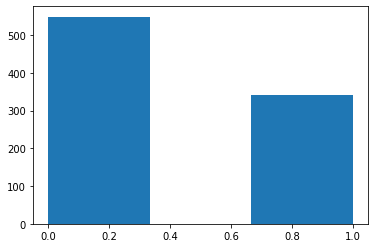

In [11]:
# check the frequency of each class
plt.hist(data["Survived"], bins=3)

###Randomly split the data into train and test subsets

In [12]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:] # predictors
y = data["Survived"] # target

print(f"Shape of dataset: {data.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
print(f"Shape of X_train: {X_train.shape}") 

Shape of dataset: (891, 10)
Shape of X: (891, 9)
Shape of y: (891,)
Shape of X_train: (668, 9)


###Train logistic regression classifier:

Logit Equation:   $log odds = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Logistic Regression Equation: 
## $ p = \frac{1}{1+ e^{-(β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k})}}$

In [13]:
# create linear regression object
logistic_reg = linear_model.LogisticRegression()
# fit the linear regression model to your training data
logistic_reg.fit(X_train, y_train)
print(f"intercept:{logistic_reg.intercept_}\n")
print(f"Estiamted coefficients:{logistic_reg.coef_}")

intercept:[3.65439288]

Estiamted coefficients:[[-0.03861835 -0.34835268 -0.0320934   0.00327954 -2.53548487  0.18527678
  -0.21036403 -0.94215821 -1.89593868]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###Test the prediction performance:

![](https://drive.google.com/uc?export=view&id=1MAzhijNiex7OpXI8ZEwNjJ6005jmnGwT) ![](https://drive.google.com/uc?export=view&id=1xtpS0KAt9j5gqRL4ZB1k3n5dHxJG7fVq)

In [14]:
y_pred = logistic_reg.predict(X_test)
print(y_pred)
probalilities = logistic_reg.predict_proba(X_test)
print(f"Estiamted Probabilities:{probalilities}")

[1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0]
Estiamted Probabilities:[[0.23766249 0.76233751]
 [0.86992016 0.13007984]
 [0.48716162 0.51283838]
 [0.79204732 0.20795268]
 [0.89289656 0.10710344]
 [0.84874481 0.15125519]
 [0.26721681 0.73278319]
 [0.23510742 0.76489258]
 [0.25376467 0.74623533]
 [0.40880666 0.59119334]
 [0.36531543 0.63468457]
 [0.37926454 0.62073546]
 [0.20390481 0.79609519]
 [0.87069794 0.12930206]
 [0.13971738 0.86028262]
 [0.25657441 0.74342559]
 [0.13066983 0.86933017]
 [0.51859391 0.48140609]
 [0.63990748 0.36009252]
 [0.80737278 0.19262722]
 [0.4836246  0.5163754

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The `roc_auc_score` function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions.

In [16]:
# using sklearn metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc}\n") 

auc = metrics.roc_auc_score(y_test, probalilities[:, 1])
print(f"Test Area Under ROC curve (AUC): {auc}\n") 

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

Test Accuracy: 0.7982062780269058

Test Area Under ROC curve (AUC): 0.8576139088729017



array([[120,  19],
       [ 26,  58]])

Find TP, TN, FP, and FN to calculate Sensitivity, Specificity, and Precision:

In [18]:
tn, fp, fn, tp = confusion_mat.ravel()
fp

19

Plot the ROC curve:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


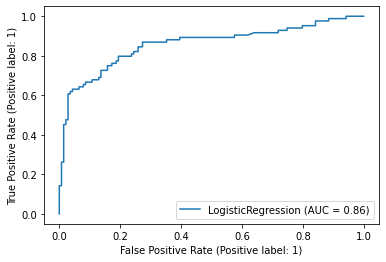

In [19]:
metrics.plot_roc_curve(logistic_reg, X_test, y_test)

Cumulative Gain Plot:

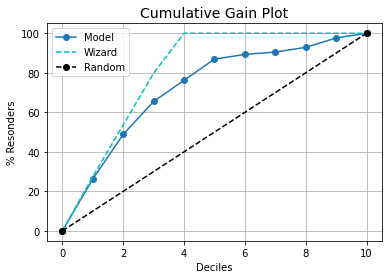

In [20]:
!pip install kds
import kds

kds.metrics.plot_cumulative_gain(y_test, probalilities[:,1])
plt.show()